<a href="https://colab.research.google.com/github/headhuncho1234/HW/blob/main/Vehicle_Protect_Project_(2)_CLEANING_BRAND_PIPELINE_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dmba

In [ ]:
# Import necessary libraries
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For creating visualizations
import seaborn as sns # For creating more aesthetically pleasing visualizations
from sklearn.model_selection import train_test_split # To split data into training and testing sets for machine learning
from sklearn.linear_model import LinearRegression # To implement a linear regression model
from sklearn.tree import DecisionTreeClassifier # To implement a decision tree classifier
from sklearn.ensemble import RandomForestClassifier # To implement a random forest classifier
import dmba

Colab environment detected.


In [ ]:
# Load the dataset from the specified CSV file into a pandas DataFrame
car_car_df = pd.read_csv("used_cars.csv")

In [ ]:
# Display the first 5 rows of the DataFrame to get a quick overview of the data
car_car_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
# Set the pandas option to display all columns when printing the DataFrame head/tail
pd.set_option('display.max_columns', None)

In [ ]:
# Display the last 5 rows of the DataFrame
car_car_df.tail()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"
4008,BMW,X3 xDrive30i,2020,"43,000 mi.",Gasoline,248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Brown,At least 1 accident or damage reported,Yes,"$40,000"


In [ ]:
# Generate descriptive statistics of the numerical columns in the DataFrame
car_car_df.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [ ]:
# Print information about the DataFrame, including the index dtype and column dtypes, non-null values and memory usage
car_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [ ]:
# Count the number of missing values in each column of the DataFrame
car_car_df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


In [ ]:
# Remove rows with any missing values and modify the DataFrame in place
car_car_df.dropna(inplace=True)

In [ ]:
# Check for duplicate rows and remove them, modifying the DataFrame in place
car_car_df.duplicated().sum() # Count duplicate rows
car_car_df.drop_duplicates(inplace=True) # Drop duplicate rows

In [ ]:
import pandas as pd # Import pandas

car_car_df['hp'] = pd.to_numeric(car_car_df['engine'].str.extract(r'(\d+\.?\d*)HP')[0], errors='coerce')

# Create engine displacement
car_car_df['engine displacement'] = pd.to_numeric(car_car_df['engine'].str.extract(r'(\d+\.?\d+)\s*L')[0], errors='coerce')
car_car_df['engine displacement'] = car_car_df['engine displacement'].fillna(pd.to_numeric(car_car_df['engine'].str.extract(r'(\d+\.?\d+)\s*LITER')[0], errors='coerce'))


# Is it V type or not
car_car_df['is_v_engine'] = car_car_df['engine'].str.contains(r'V\d+', case=False, na=False)

In [ ]:
# Display the data types of each column in the DataFrame
car_car_df.dtypes

,0
brand,object
model,object
model_year,int64
milage,object
fuel_type,object
engine,object
transmission,object
ext_col,object
int_col,object
accident,object


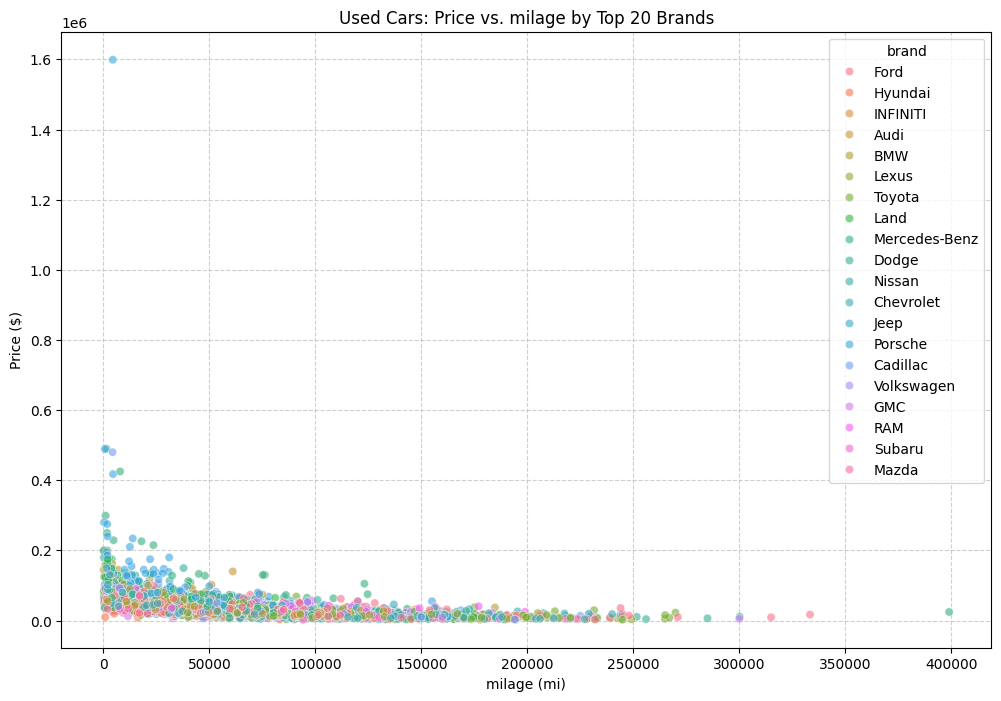

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn

# --- Clean milage ---
# Convert 'milage' to string, remove commas and ' mi.', convert to numeric, fill missing with 0, convert to int
car_car_df['milage'] = (
    car_car_df['milage'].astype(str) # Convert to string first
                        .str.replace(',', '', regex=False)   # remove commas
                        .str.replace(' mi.', '', regex=False)  # remove ' mi.'
)
car_car_df['milage'] = pd.to_numeric(car_car_df['milage'], errors='coerce').fillna(0).astype(int)

# --- Clean price ---
# Convert 'price' to string, remove '$' and commas, convert to numeric, fill missing with 0, convert to int
car_car_df['price'] = (
    car_car_df['price'].astype(str) # Convert to string first
                       .str.replace(r'[\$,]', '', regex=True)  # remove $ and commas
)
car_car_df['price'] = pd.to_numeric(car_car_df['price'], errors='coerce').fillna(0).astype(int)

# Select top 10 brands based on their frequency for plotting
top_brands = car_car_df['brand'].value_counts().nlargest(20).index
car_car_df_top_brands = car_car_df[car_car_df['brand'].isin(top_brands)]


# --- Scatter plot: Price vs milage by Brand ---
# Create a scatter plot showing the relationship between milage and price, colored by brand for the top 10 brands
plt.figure(figsize=(12, 8))
sns.scatterplot(data=car_car_df_top_brands, x='milage', y='price', hue='brand', alpha=0.6)
plt.title("Used Cars: Price vs. milage by Top 20 Brands")
plt.xlabel("milage (mi)")
plt.ylabel("Price ($)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Select 'model_year' and 'milage' as features (X) and 'price' as the target variable (y) for the model
features = ['model_year', 'milage']
target = 'price'

X = car_car_df[features]
y = car_car_df[target]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

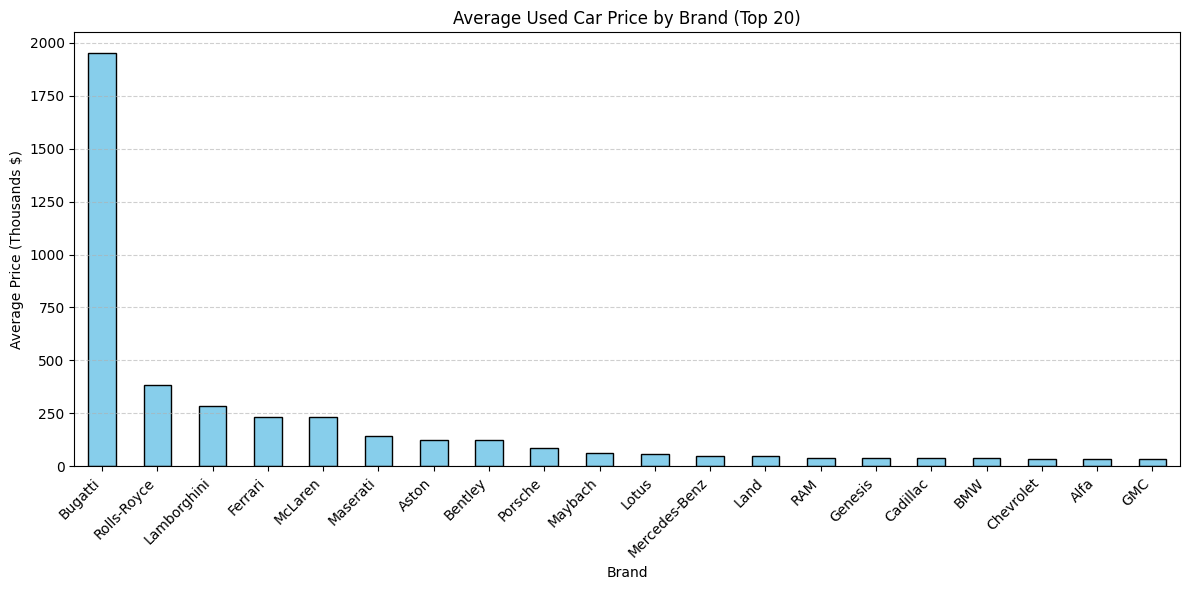

In [ ]:
# --- Average price by brand ---
# Calculate the average price for each brand, sort in descending order, and select the top 15
brand_prices = (
    car_car_df.groupby('brand')['price']
              .mean()
              .sort_values(ascending=False)
              .head(20)   # top 20 brands
)

# --- Plot ---
# Create a bar plot to visualize the average price of the top 20 brands
plt.figure(figsize=(12,6))
brand_prices.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Used Car Price by Brand (Top 20)")
plt.ylabel("Average Price (Thousands $)") # Update y-axis label
plt.xlabel("Brand")
plt.xticks(rotation=45, ha="right") # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6) # Add a horizontal grid

# Format y-axis labels to show values in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}'))

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

In [ ]:
# Feature extraction # Create hp column
car_car_df['hp'] = car_car_df['engine'].str.extract(r'(\d+\.\d+)HP').astype(float, errors='ignore')

# Create engine displacement
car_car_df['engine displacement'] = car_car_df['engine'].str.extract(r'(\d+\.\d+)\s*L')
car_car_df['engine displacement'] = car_car_df['engine displacement'].fillna(car_car_df['engine'].str.extract(r'(\d+\.\d+)\s*LITER')[0])
car_car_df['engine displacement'] = car_car_df['engine displacement'].astype(float, errors='ignore')

# Is it V type or not
car_car_df['is_v_engine'] = car_car_df['engine'].str.contains(r'V\d+', case=False, na=False)

In [ ]:
#cleaning the fuel_type feature
car_car_df['fuel_type'] = car_car_df['fuel_type'].str.strip().str.upper().replace({'PLUG-IN HYBRID': 'HYBRID', 'NOT SUPPORTED':'OTHER', '–':'OTHER'})

car_car_df['fuel_type'].value_counts()

,count
fuel_type,
GASOLINE,2815
HYBRID,178
E85 FLEX FUEL,128
DIESEL,102
OTHER,46


In [ ]:
#cleaning the transmission feature

def classify_transmission(transmission):
    T = str(transmission).upper()

    if 'M/T' in T or 'MT' in T or 'MANUAL' in T:
        return 'M/T'
    elif 'A/T' in T or 'AT' in T or 'AUTOMATIC' in T:
        return 'A/T'
    elif 'CVT' in T or 'VARIABLE' in T or 'SINGLE-SPEED' in T:
        return 'CVT'
    else:
        return 'OTHER'

car_car_df['transmission'] = car_car_df['transmission'].apply(classify_transmission)

car_car_df['transmission'].unique()

array(['A/T', 'OTHER', 'M/T', 'CVT'], dtype=object)

In [ ]:
#handling missing values

car_car_df['hp'] = car_car_df.groupby('brand')['hp'].transform(lambda x: x.fillna(x.mean()))

car_car_df.dropna(subset=['hp'], inplace=True)

most_common_fuel = car_car_df.groupby('brand')['fuel_type'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

car_car_df['fuel_type'] = car_car_df.apply(
    lambda row: most_common_fuel[row['brand']] if pd.isna(row['fuel_type']) else row['fuel_type'],
    axis=1
)

car_car_df['fuel_type'] = car_car_df['fuel_type'].fillna('OTHER')

most_common_displacement = car_car_df.groupby('brand')['engine displacement'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

car_car_df['engine displacement'] = car_car_df.apply(
    lambda row: most_common_displacement[row['brand']] if pd.isna(row['engine displacement']) else row['engine displacement'],
    axis=1
)

car_car_df['engine displacement'] = car_car_df['engine displacement'].fillna(car_car_df['engine displacement'].median())

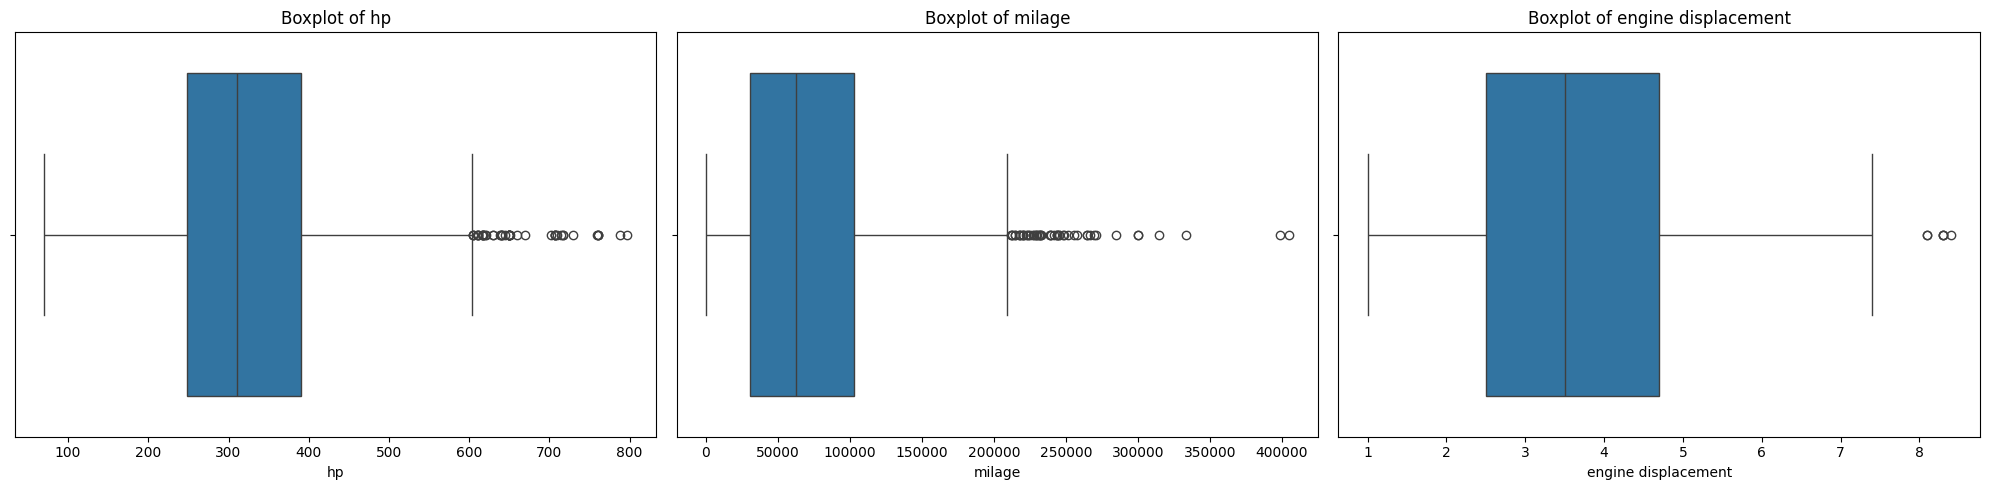

In [ ]:
#removing outliers

columns = ['hp', 'milage', 'engine displacement']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(x=car_car_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(f'{col}')

plt.tight_layout()
plt.show()

In [ ]:
columns = ['engine displacement', 'hp', 'price', 'milage']
for col in columns:
    Q1 = car_car_df[col].quantile(0.25)
    Q3 = car_car_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    car_car_df = car_car_df[(car_car_df[col] >= lower_bound) & (car_car_df[col] <= upper_bound)]

In [ ]:
car_car_df.shape

(2990, 15)

In [ ]:
#encoding catergorical features
car_car_df['accident'] = car_car_df['accident'].apply(lambda x: 1 if x == 'At least 1 accident or damage reported' else 0)
car_car_df['clean_title'] = car_car_df['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)



In [ ]:
vis_df = car_car_df.copy()
vis_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,hp,engine displacement,is_v_engine
0,Ford,Utility Police Interceptor Base,2013,51000,E85 FLEX FUEL,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,A/T,Black,Black,1,1,10300,300.000000,3.7,True
1,Hyundai,Palisade SEL,2021,34742,GASOLINE,3.8L V6 24V GDI DOHC,A/T,Moonlight Cloud,Gray,1,1,38005,246.277778,3.8,True
3,INFINITI,Q50 Hybrid Sport,2015,88900,HYBRID,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,A/T,Black,Black,0,1,15500,354.000000,3.5,True
6,Audi,S3 2.0T Premium Plus,2017,84000,GASOLINE,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,0,1,31000,292.000000,2.0,False
8,Lexus,RC 350 F Sport,2021,23436,GASOLINE,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,0,1,41927,311.000000,3.5,True


In [ ]:
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

categorical_columns = ['fuel_type', 'transmission', 'is_v_engine']

for cat_col in categorical_columns:
    encoder = LabelEncoder()
    car_car_df[cat_col] = encoder.fit_transform(car_car_df[cat_col])

In [ ]:
#feature engineering
car_car_df['Vehicle_Age'] = 2025 - car_car_df['model_year']

In [ ]:
car_car_df['milage_per_Year'] = car_car_df.apply(
    lambda row: row['milage'] / row['Vehicle_Age'] if row['Vehicle_Age'] > 0 else row['milage'],
    axis=1
)

In [ ]:
car_car_df['Vehicle_Age_Bin'] = pd.qcut(car_car_df['Vehicle_Age'], q=4, labels=['New', 'Mid', 'Old', 'Very Old'])
car_car_df['milage_Bin'] = pd.qcut(car_car_df['milage'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# One-hot encode
car_car_df = pd.get_dummies(car_car_df, columns=['Vehicle_Age_Bin', 'milage_Bin'], prefix=['Age', 'Milage'], drop_first=True, dtype=int)

In [ ]:
# drop unused feature
columns_to_drop = ['model', 'model_year', 'engine', 'int_col', 'ext_col', 'accident']
existing_columns_to_drop = [col for col in columns_to_drop if col in car_car_df.columns]
car_car_df.drop(existing_columns_to_drop, axis = 1, inplace = True)

In [ ]:
car_car_df.isnull().sum()

,0
brand,0
milage,0
fuel_type,0
transmission,0
clean_title,0
price,0
hp,0
engine displacement,0
is_v_engine,0
Vehicle_Age,0


In [ ]:
car_car_df.head()

,brand,milage,fuel_type,transmission,clean_title,price,hp,engine displacement,is_v_engine,Vehicle_Age,milage_per_Year,Age_Mid,Age_Old,Age_Very Old,Milage_Medium,Milage_High,Milage_Very High
0,Ford,51000,1,0,1,10300,300.000000,3.7,1,12,4250.0,0,1,0,1,0,0
1,Hyundai,34742,2,0,1,38005,246.277778,3.8,1,4,8685.5,0,0,0,0,0,0
3,INFINITI,88900,3,0,1,15500,354.000000,3.5,1,10,8890.0,0,1,0,0,1,0
6,Audi,84000,2,0,1,31000,292.000000,2.0,0,8,10500.0,1,0,0,0,1,0
8,Lexus,23436,2,0,1,41927,311.000000,3.5,1,4,5859.0,0,0,0,0,0,0


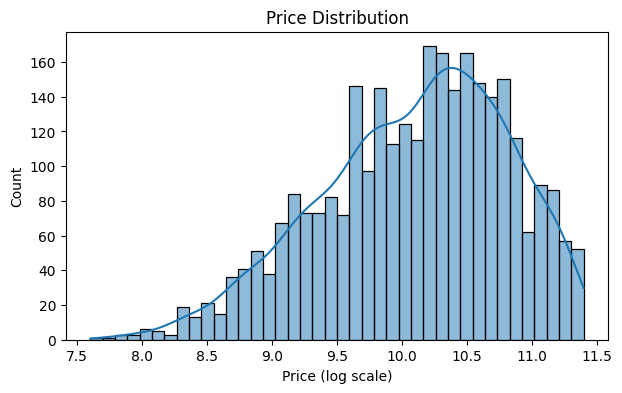

In [ ]:
# Data Visualization
plt.figure(figsize=(7,4))
sns.histplot(np.log1p(car_car_df['price']), bins=40, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (log scale)')
plt.ylabel('Count')
plt.show()

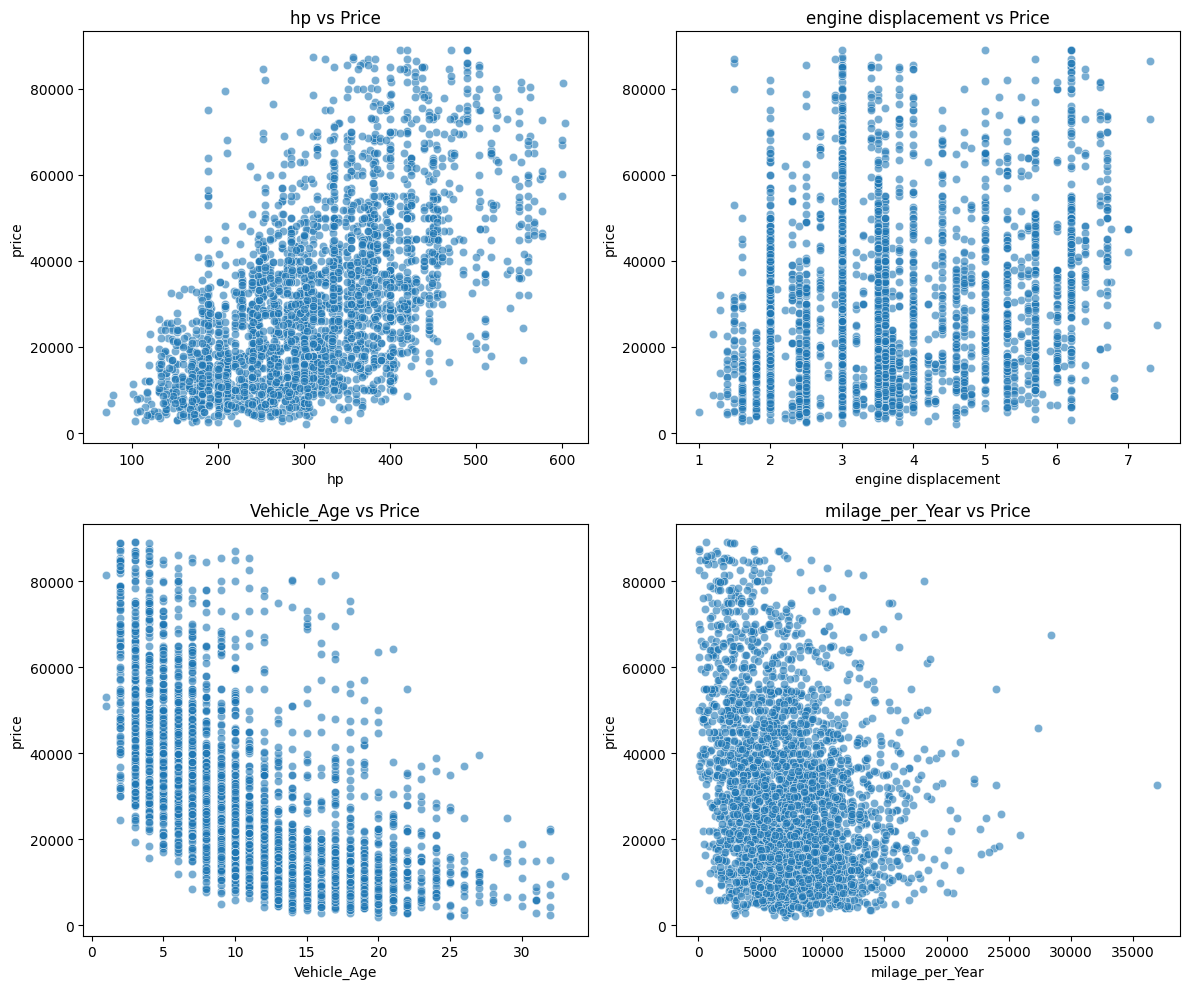

In [ ]:
num_cols = ['hp','engine displacement','Vehicle_Age','milage_per_Year']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.scatterplot(x=car_car_df[col], y=car_car_df['price'], alpha=0.6, ax=axes[i])
    axes[i].set_title(f'{col} vs Price')

plt.tight_layout()
plt.show()

<Axes: >

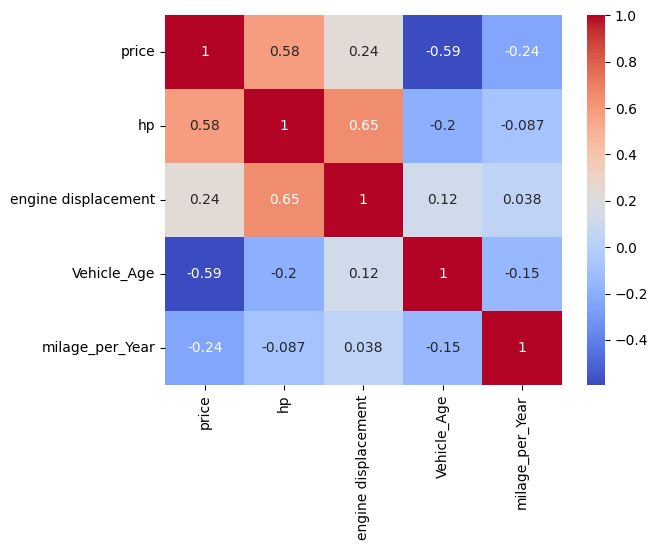

In [ ]:
num_features = ['price','hp','engine displacement','Vehicle_Age','milage_per_Year']
sns.heatmap(car_car_df[num_features].corr(), annot=True, cmap='coolwarm')

/tmp/ipython-input-1660663972.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


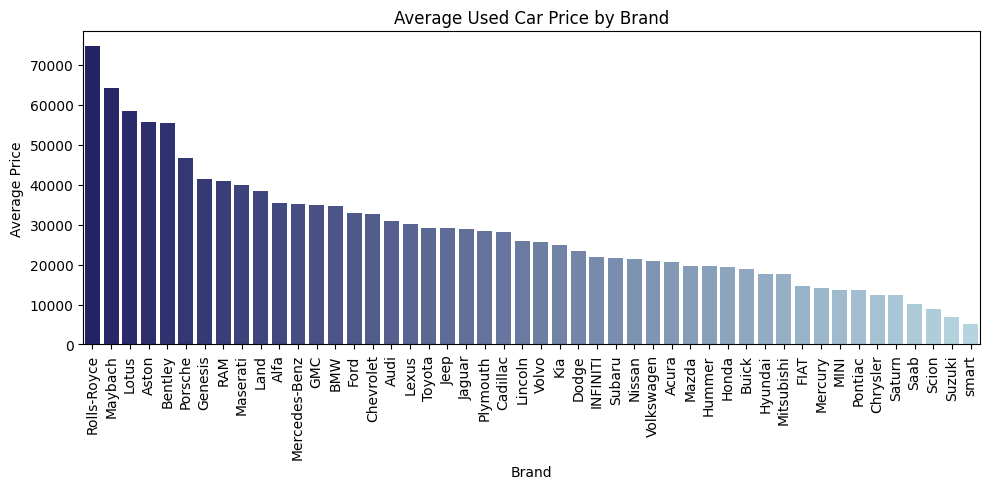

In [ ]:
brand_avg_price = (
    vis_df.groupby('brand')['price']
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
sns.barplot(
    x=brand_avg_price.index,
    y=brand_avg_price.values,
    palette=sns.color_palette("blend:midnightblue,lightblue", n_colors=len(brand_avg_price)
))
plt.xticks(rotation=90)
plt.title("Average Used Car Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3522639044.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


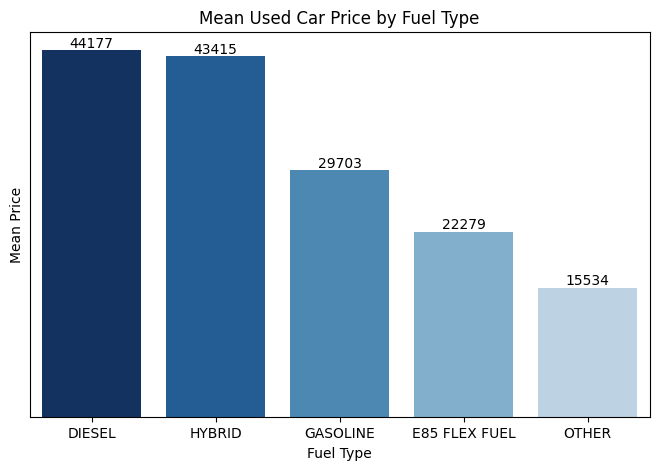

In [ ]:
order = (
    vis_df.groupby('fuel_type')['price']
          .mean()
          .sort_values(ascending=False)
          .index
)


mean = vis_df.groupby('fuel_type')['price'].mean().loc[order]

# Color Grediant
cmap = plt.colormaps.get_cmap('Blues')
colors = [cmap(x) for x in np.linspace(1, 0.3, len(mean))]

plt.figure(figsize=(8,5))
ax = sns.barplot(
    x='fuel_type',
    y='price',
    data=vis_df,
    order=order,
    estimator=np.mean,
    errorbar=None,
    palette=colors
)

plt.title("Mean Used Car Price by Fuel Type")
plt.xlabel("Fuel Type")
ax.set_ylabel("Mean Price")
ax.set_yticks([])


for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show()

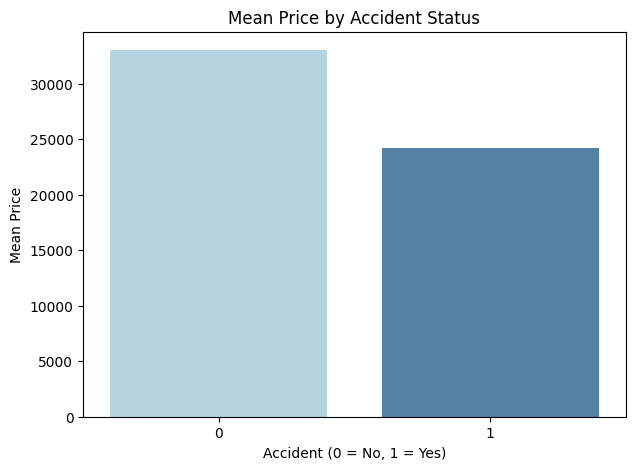

In [ ]:
plt.figure(figsize=(7,5))

sns.barplot(
    x='accident',
    y='price',
    data=vis_df,
    estimator=np.mean,
    errorbar=None,
    palette= ['lightblue','steelblue'],
    hue='accident',  # Assign the x variable to hue
    legend=False     # Set legend to False
)

plt.title("Mean Price by Accident Status")
plt.xlabel("Accident (0 = No, 1 = Yes)")
plt.ylabel("Mean Price")
plt.show()

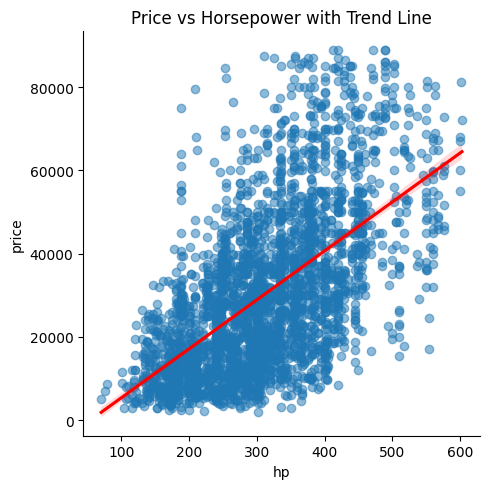

In [ ]:
sns.lmplot(data=car_car_df, x='hp', y='price', line_kws={'color':'red'}, scatter_kws={'alpha':0.5})
plt.title('Price vs Horsepower with Trend Line')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2558500804.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


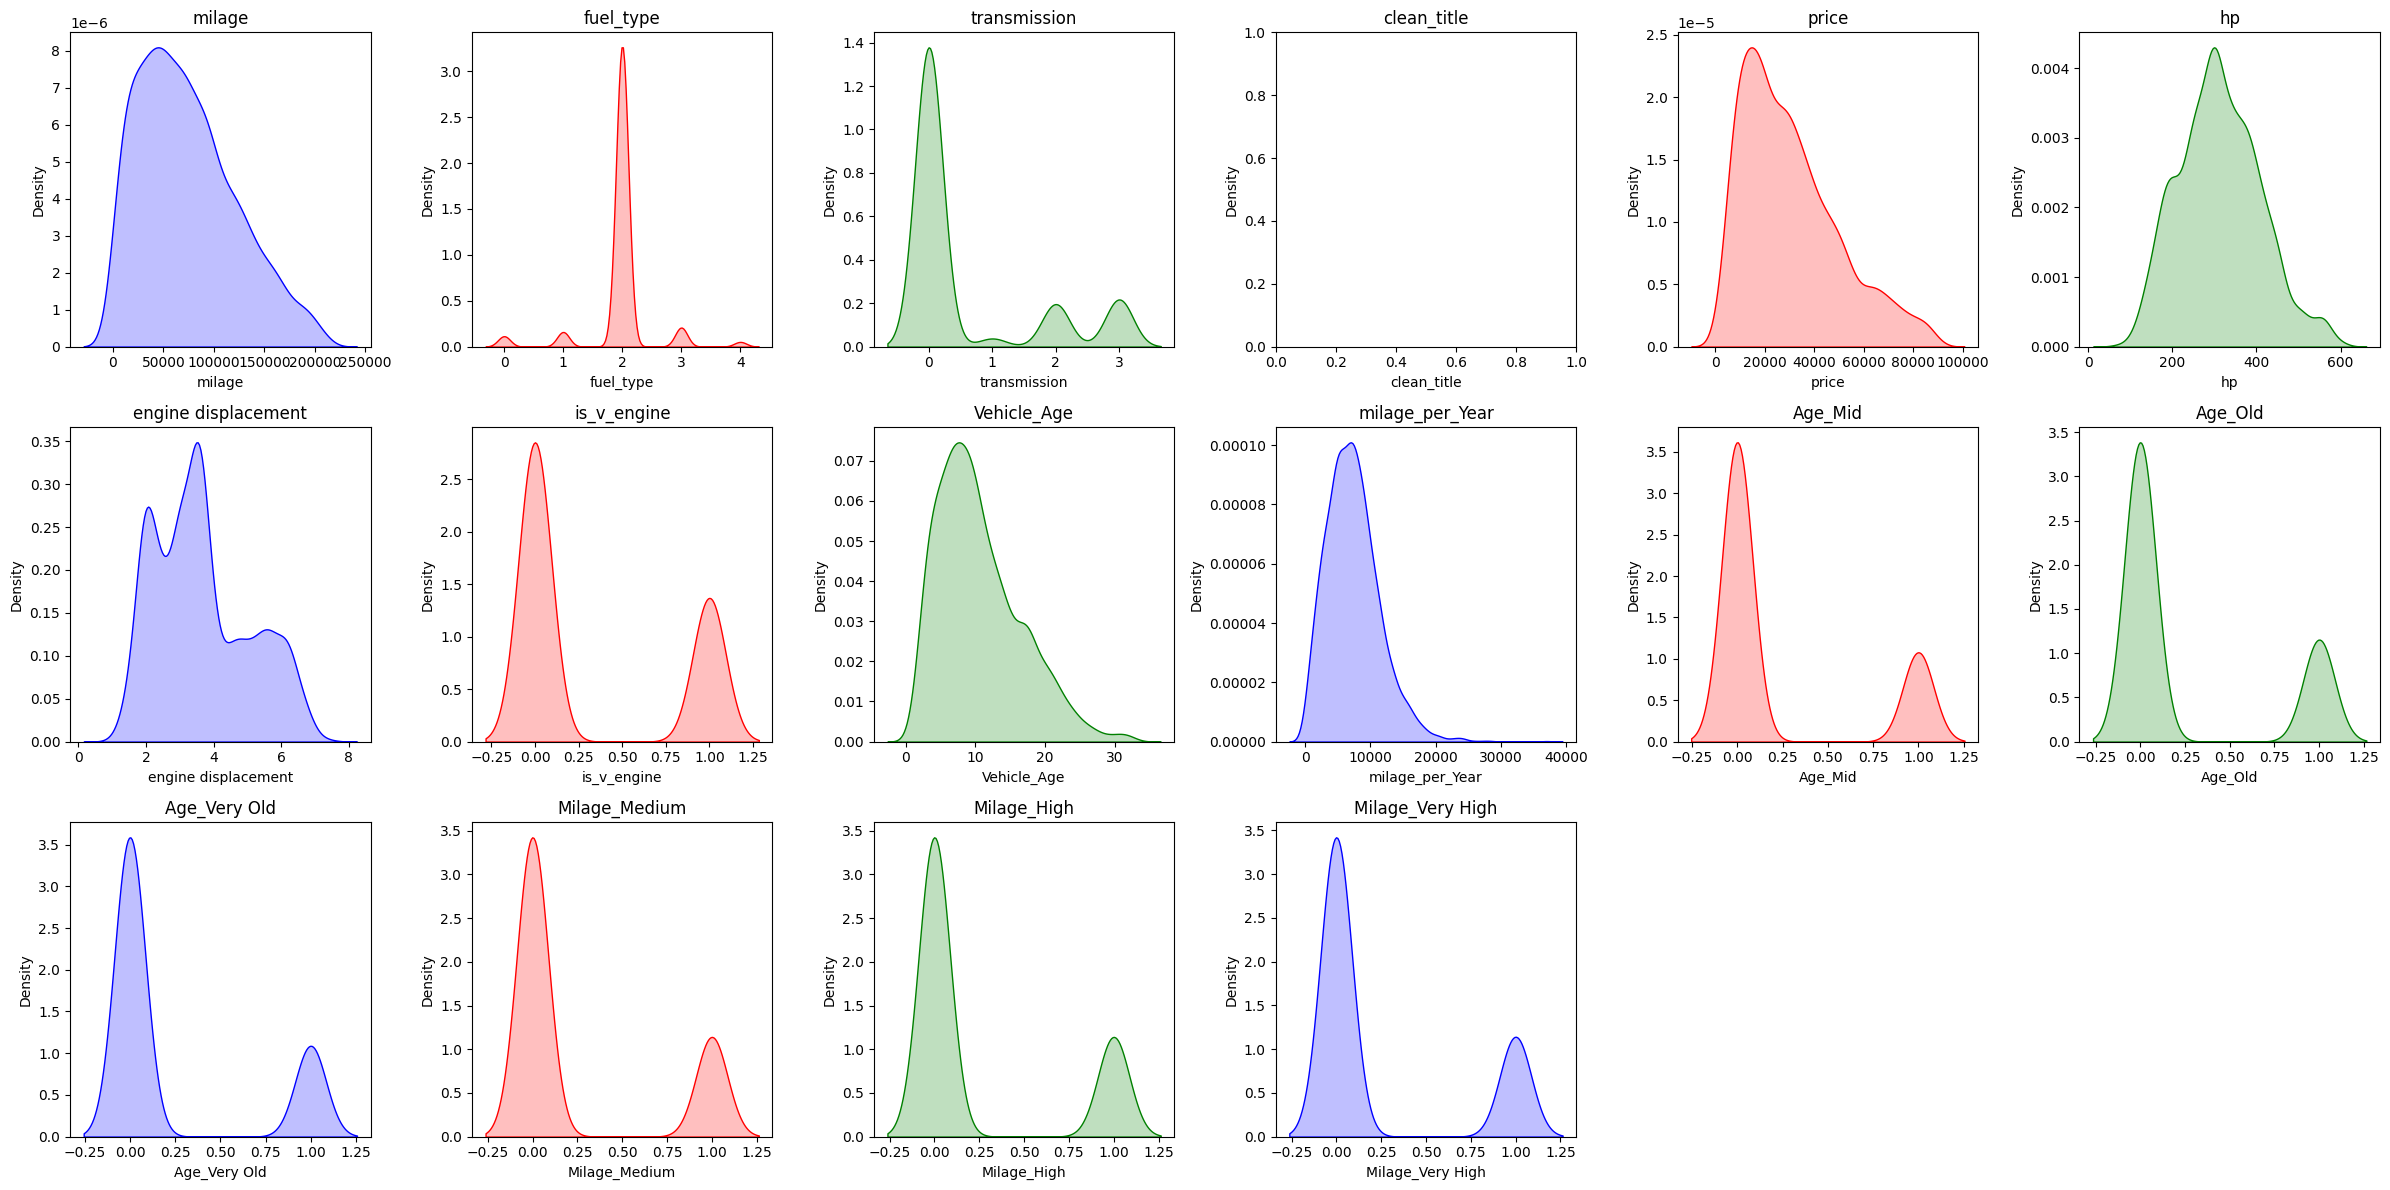

In [ ]:
car_car_df.replace([np.inf, -np.inf], np.nan, inplace=True)

n_rows = 3
numeric_column_name = car_car_df.select_dtypes(include='number').columns
n_cols = int(np.ceil(len(numeric_column_name)/n_rows))
colors = ['blue', 'red', 'green']

plt.figure(figsize=(4*n_cols, 4*n_rows))
for idx, column in enumerate(numeric_column_name, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.kdeplot(
        data=car_car_df,
        x=column,
        fill=True,
        color=colors[(idx-1) % len(colors)]
    )
    plt.title(column)
plt.tight_layout()
plt.show()

## Added: Brand Target Encoding + Interactions (Placed After Cleaning)

This section introduces a leakage-safe pipeline that:
- Target-encodes `brand`.
- Adds interaction features (`brand_encoded × vehicle_age / milage / engine_disp`).
- One-hot encodes other categorical variables.
- Retains numeric variables.
- Fits Linear Regression, evaluates metrics, and runs cross-validation.

RMSE: 9208.353793276965
MAE : 6815.469160791548
R²  : 0.7537242254297416
CV R² : 0.7259816530008635
CV RMSE: 10250.522827458886

Top 25 features by |coefficient|:


,feature,coefficient,abs_coef
0,Age_Old,-9.470534e+03,9.470534e+03
1,Milage_High,-6.518584e+03,6.518584e+03
2,Age_Very Old,-6.517316e+03,6.517316e+03
3,Age_Mid,-6.031481e+03,6.031481e+03
4,Milage_Very High,-5.229813e+03,5.229813e+03
5,Milage_Medium,-4.467447e+03,4.467447e+03
6,fuel_type,-1.753807e+03,1.753807e+03
7,is_v_engine,-7.909915e+02,7.909915e+02
8,Vehicle_Age,-7.081214e+02,7.081214e+02
9,engine displacement,6.792980e+02,6.792980e+02


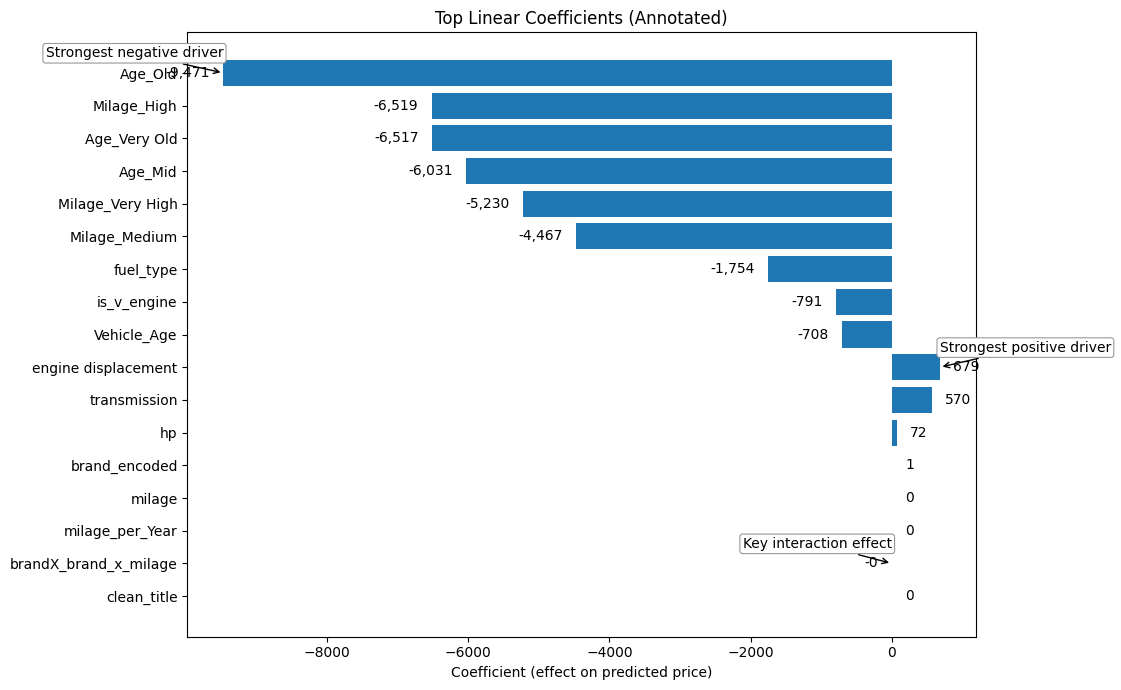


Quick takeaways:
 • Strongest positive driver: engine displacement (coef ≈ 679)
 • Strongest negative driver: Age_Old (coef ≈ -9,471)
 • Notable interaction: brandX_brand_x_milage (coef ≈ -0) → brand effect changes with that numeric variable.

How to read this chart:
 • Positive bars increase predicted price; negative bars decrease it, holding other features constant.
 • Interaction terms like 'brandX_brand_x_vehicle_age' show brand-specific depreciation with age/mileage.
 • Absolute magnitude reflects influence scale in the model’s linear space (units = price).


In [ ]:
# ================== BRAND ENCODING + INTERACTIONS + METRICS + EXPLAIN ==================
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ---------- 1) Ensure engineered numeric fields exist ----------
df = car_car_df.copy()

# vehicle_age from model_year (if available)
if "model_year" in df.columns and "vehicle_age" not in df.columns:
    current_year = pd.Timestamp.now().year
    df["vehicle_age"] = current_year - pd.to_numeric(df["model_year"], errors="coerce")

# engine_disp from engine strings like "2.0L"
if "engine" in df.columns and "engine_disp" not in df.columns:
    def parse_disp(x):
        if pd.isna(x): return np.nan
        m = re.search(r"(\d+(\.\d+)?)\s*[lL]", str(x))
        return float(m.group(1)) if m else np.nan
    df["engine_disp"] = df["engine"].apply(parse_disp)

# price numeric & positive
assert "price" in df.columns, "Expected a 'price' column."
df["price"] = pd.to_numeric(
    df["price"].astype(str).str.replace("$","",regex=False).str.replace(",","",regex=False),
    errors="coerce"
)
df = df[df["price"].notna() & (df["price"] > 0)]

# ---------- 2) Split y/X ----------
y = df["price"].astype(float)
X = df.drop(columns=["price"]).copy()

# identify brand column
brand_col = "brand" if "brand" in X.columns else ("make" if "make" in X.columns else None)
assert brand_col is not None, "Couldn't find a brand-like column (expected 'brand' or 'make')."

# cat & numeric columns
cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
if brand_col in cat_cols:
    cat_cols.remove(brand_col)

# which numeric columns to interact with brand
interaction_with = [c for c in ["vehicle_age","milage","engine_disp"] if c in X.columns]

# ---------- 3) Custom transformer: target-encode brand + interactions (sklearn-compliant) ----------
class BrandTargetEncoderWithInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, brand_col="brand", interaction_with=None,
                 smoothing=10.0, min_samples_leaf=3, drop_brand=True, prefix="brandX"):
        self.brand_col = brand_col
        self.interaction_with = interaction_with  # do not mutate in fit()
        self.smoothing = smoothing
        self.min_samples_leaf = min_samples_leaf
        self.drop_brand = drop_brand
        self.prefix = prefix

    def fit(self, X, y):
        X = pd.DataFrame(X).copy()
        y = pd.Series(y).astype(float)

        self.global_mean_ = float(y.mean())
        stats = (pd.DataFrame({"y": y, self.brand_col: X[self.brand_col]})
                 .groupby(self.brand_col)["y"].agg(["mean","count"]))
        counts, means = stats["count"], stats["mean"]
        smooth = (counts * means + self.smoothing * self.global_mean_) / (counts + self.smoothing)
        smooth[counts < self.min_samples_leaf] = self.global_mean_
        self.map_ = smooth

        # internal copy (safe for sklearn clone)
        self._interaction_with_ = list(self.interaction_with) if self.interaction_with is not None else []
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        X["brand_encoded"] = X[self.brand_col].map(self.map_).fillna(self.global_mean_)
        for col in self._interaction_with_:
            X[f"{self.prefix}_{self.brand_col}_x_{col}"] = X["brand_encoded"] * X[col]
        if self.drop_brand:
            X = X.drop(columns=[self.brand_col], errors="ignore")
        return X

    def get_feature_names_out(self, input_features=None):
        inters = [f"{self.prefix}_{self.brand_col}_x_{c}"
                  for c in (self._interaction_with_ if hasattr(self, "_interaction_with_") else (self.interaction_with or []))]
        return np.array(["brand_encoded"] + inters)

# ---------- 4) Build pipeline (brand target-enc + OHE others + passthrough numerics) ----------
pipe = Pipeline([
    ("brand_enc", BrandTargetEncoderWithInteractions(
        brand_col=brand_col,
        interaction_with=interaction_with,
        smoothing=10,
        min_samples_leaf=3,
        drop_brand=True,
        prefix="brandX"
    )),
    ("prep", ColumnTransformer([
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first"), cat_cols),
    ], remainder="passthrough")),
    ("model", LinearRegression())
])

# ---------- 5) Train/test fit + metrics ----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, pred)
r2   = r2_score(y_test, pred)

print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)

# Cross-validation (compat-friendly RMSE via neg_mean_squared_error)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2  = cross_val_score(pipe, X_train, y_train, scoring="r2", cv=kf).mean()
cv_mse = -cross_val_score(pipe, X_train, y_train, scoring="neg_mean_squared_error", cv=kf).mean()
cv_rmse = np.sqrt(cv_mse)
print("CV R² :", cv_r2)
print("CV RMSE:", cv_rmse)

# ---------- 6) Coefficients: names + values (robust to sklearn versions) ----------
def feature_names_from_ct(ct, X_after_brand, cat_cols):
    # Try modern API
    try:
        names = list(ct.get_feature_names_out())
        return [n.replace("remainder__", "") for n in names]
    except Exception:
        # Fallback: manual build
        ohe = ct.named_transformers_.get("ohe", None)
        ohe_names = []
        if ohe is not None and hasattr(ohe, "categories_") and len(cat_cols) > 0:
            drop_mode = getattr(ohe, "drop", None)
            for col, cats in zip(cat_cols, ohe.categories_):
                start = 1 if drop_mode in ("first", "if_binary") else 0
                ohe_names.extend([f"{col}_{c}" for c in cats[start:]])
        passthrough_names = [c for c in X_after_brand.columns if c not in cat_cols]
        return ohe_names + passthrough_names

# Feature names in model order
X_after_brand = pipe.named_steps["brand_enc"].transform(X_train.copy())
ct = pipe.named_steps["prep"]
feature_names = feature_names_from_ct(ct, X_after_brand, cat_cols)

coefs = pipe.named_steps["model"].coef_
coef_df = (pd.DataFrame({"feature": feature_names, "coefficient": coefs})
           .assign(abs_coef=lambda d: d["coefficient"].abs())
           .sort_values("abs_coef", ascending=False)
           .reset_index(drop=True))

print("\nTop 25 features by |coefficient|:")
display(coef_df.head(25))

# ---------- 7) Annotated bar chart + quick takeaways ----------
topn = 20
top_df = coef_df.head(topn).copy()[::-1]  # reverse for barh

plt.figure(figsize=(10, 7))
bars = plt.barh(top_df["feature"], top_df["coefficient"])

# annotate bar values
mx = np.max(np.abs(top_df["coefficient"])) + 1e-9
for bar, val in zip(bars, top_df["coefficient"]):
    x = bar.get_width()
    y = bar.get_y() + bar.get_height()/2
    offset = 0.02 * mx
    ha = "left" if x >= 0 else "right"
    tx = x + (offset if x >= 0 else -offset)
    plt.text(tx, y, f"{val:,.0f}", va="center", ha=ha)

plt.title("Top Linear Coefficients (Annotated)")
plt.xlabel("Coefficient (effect on predicted price)")
plt.ylabel("")
plt.tight_layout()

# helpers to annotate strongest pos/neg + first interaction
def safe_row(df, which="max"):
    if df.empty: return None
    idx = df["coefficient"].idxmax() if which=="max" else df["coefficient"].idxmin()
    return df.loc[idx]

strong_pos = safe_row(coef_df, "max")
strong_neg = safe_row(coef_df, "min")
inter_mask = coef_df["feature"].str.contains("_x_")
strong_inter = coef_df[inter_mask].head(1).iloc[0] if inter_mask.any() else None

def annotate_feature(row, label):
    if row is None: return
    try:
        # find bar index in top_df
        i = top_df.index.get_loc(row.name)
    except KeyError:
        return
    bar = bars[i]
    xend = bar.get_width()
    ycenter = bar.get_y() + bar.get_height()/2
    xstart = (xend + 0.1*np.sign(xend)) if xend != 0 else 0.1
    plt.annotate(
        label,
        xy=(xend, ycenter),
        xytext=(xstart, ycenter + 0.6),
        arrowprops=dict(arrowstyle="->", lw=1),
        ha="left" if xstart >= 0 else "right",
        va="center",
        bbox=dict(boxstyle="round,pad=0.2", fc="w", ec="0.6", lw=0.8)
    )

annotate_feature(strong_pos, "Strongest positive driver")
annotate_feature(strong_neg, "Strongest negative driver")
if strong_inter is not None:
    annotate_feature(strong_inter, "Key interaction effect")

plt.show()

print("\nQuick takeaways:")
if strong_pos is not None:
    print(f" • Strongest positive driver: {strong_pos['feature']} (coef ≈ {strong_pos['coefficient']:,.0f})")
if strong_neg is not None:
    print(f" • Strongest negative driver: {strong_neg['feature']} (coef ≈ {strong_neg['coefficient']:,.0f})")
if strong_inter is not None:
    print(f" • Notable interaction: {strong_inter['feature']} (coef ≈ {strong_inter['coefficient']:,.0f}) "
          f"→ brand effect changes with that numeric variable.")

print("\nHow to read this chart:")
print(" • Positive bars increase predicted price; negative bars decrease it, holding other features constant.")
print(" • Interaction terms like 'brandX_brand_x_vehicle_age' show brand-specific depreciation with age/mileage.")
print(" • Absolute magnitude reflects influence scale in the model’s linear space (units = price).")
# ======================================================================================


In [ ]:
print(coef_df.head(25).to_string(index=False))


              feature   coefficient     abs_coef
              Age_Old -9.470534e+03 9.470534e+03
          Milage_High -6.518584e+03 6.518584e+03
         Age_Very Old -6.517316e+03 6.517316e+03
              Age_Mid -6.031481e+03 6.031481e+03
     Milage_Very High -5.229813e+03 5.229813e+03
        Milage_Medium -4.467447e+03 4.467447e+03
            fuel_type -1.753807e+03 1.753807e+03
          is_v_engine -7.909915e+02 7.909915e+02
          Vehicle_Age -7.081214e+02 7.081214e+02
  engine displacement  6.792980e+02 6.792980e+02
         transmission  5.699460e+02 5.699460e+02
                   hp  7.185542e+01 7.185542e+01
        brand_encoded  1.048064e+00 1.048064e+00
               milage  1.428799e-01 1.428799e-01
      milage_per_Year  3.097592e-02 3.097592e-02
brandX_brand_x_milage -8.052779e-06 8.052779e-06
          clean_title  1.104096e-09 1.104096e-09


In [ ]:
display(coef_df.head(25))

,feature,coefficient,abs_coef
0,Age_Old,-9.470534e+03,9.470534e+03
1,Milage_High,-6.518584e+03,6.518584e+03
2,Age_Very Old,-6.517316e+03,6.517316e+03
3,Age_Mid,-6.031481e+03,6.031481e+03
4,Milage_Very High,-5.229813e+03,5.229813e+03
5,Milage_Medium,-4.467447e+03,4.467447e+03
6,fuel_type,-1.753807e+03,1.753807e+03
7,is_v_engine,-7.909915e+02,7.909915e+02
8,Vehicle_Age,-7.081214e+02,7.081214e+02
9,engine displacement,6.792980e+02,6.792980e+02


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns to one-hot encode (excluding 'brand' for now as it's handled separately)
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
if 'brand' in categorical_features:
    categorical_features.remove('brand') # Remove brand as we will one-hot encode it specifically

# Identify numerical columns
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()


# Create a ColumnTransformer to apply one-hot encoding to categorical features
# We'll handle the 'brand' column separately for now or include it here if needed
# Let's create a transformer specifically for one-hot encoding the brand
brand_one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


# Apply one-hot encoding to the 'brand' column in both training and testing sets
X_train_brand_encoded = brand_one_hot_encoder.fit_transform(X_train[['brand']])
X_test_brand_encoded = brand_one_hot_encoder.transform(X_test[['brand']])

# Convert the encoded brand arrays back to DataFrames and name the columns
brand_feature_names = brand_one_hot_encoder.get_feature_names_out(['brand'])
X_train_brand_encoded_df = pd.DataFrame(X_train_brand_encoded, columns=brand_feature_names, index=X_train.index)
X_test_brand_encoded_df = pd.DataFrame(X_test_brand_encoded, columns=brand_feature_names, index=X_test.index)

# Drop the original 'brand' column and concatenate the one-hot encoded brand features
X_train_processed = X_train.drop('brand', axis=1).copy()
X_test_processed = X_test.drop('brand', axis=1).copy()

# Select remaining categorical columns (excluding brand) for one-hot encoding if any
remaining_categorical_features = X_train_processed.select_dtypes(include=['object', 'category']).columns.tolist()

if remaining_categorical_features:
    # Apply one-hot encoding to the remaining categorical features
    remaining_cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    X_train_remaining_cat_encoded = remaining_cat_encoder.fit_transform(X_train_processed[remaining_categorical_features])
    X_test_remaining_cat_encoded = remaining_cat_encoder.transform(X_test_processed[remaining_categorical_features])

    remaining_cat_feature_names = remaining_cat_encoder.get_feature_names_out(remaining_categorical_features)
    X_train_remaining_cat_encoded_df = pd.DataFrame(X_train_remaining_cat_encoded, columns=remaining_cat_feature_names, index=X_train_processed.index)
    X_test_remaining_cat_encoded_df = pd.DataFrame(X_test_remaining_cat_encoded, columns=remaining_cat_feature_names, index=X_test_processed.index)

    # Drop original remaining categorical columns
    X_train_processed = X_train_processed.drop(remaining_categorical_features, axis=1)
    X_test_processed = X_test_processed.drop(remaining_categorical_features, axis=1)

    # Concatenate all processed features
    X_train_final = pd.concat([X_train_processed, X_train_brand_encoded_df, X_train_remaining_cat_encoded_df], axis=1)
    X_test_final = pd.concat([X_test_processed, X_test_brand_encoded_df, X_test_remaining_cat_encoded_df], axis=1)

else:
    # If no other categorical features, just concatenate the brand encoded features
    X_train_final = pd.concat([X_train_processed, X_train_brand_encoded_df], axis=1)
    X_test_final = pd.concat([X_test_processed, X_test_brand_encoded_df], axis=1)


# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=1, max_depth=10)
rf_model.fit(X_train_final, y_train) # Use the processed data

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_final) # Use the processed test data

print("=== RANDOM FOREST RESULTS ===")
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))


=== RANDOM FOREST RESULTS ===
Random Forest R²: 0.8304921389986486
Random Forest RMSE: 7639.519994720669
Random Forest MAE: 5478.809912200722


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd # Import pandas

# Separate target variable
target = 'price' # Assuming 'price' is the target
features = [col for col in car_car_df.columns if col != target]
X = car_car_df[features]
y = car_car_df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()


# Create a ColumnTransformer to handle preprocessing
# One-hot encode categorical features and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), categorical_features) # Added drop='first'
    ],
    remainder='passthrough' # Keep other columns (if any) - although after cleaning, there might not be
)

# Create a pipeline with the preprocessor and the KNN regressor
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', KNeighborsRegressor(n_neighbors=5))])


# Fit the pipeline on the training data
knn_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_pipeline.predict(X_test)

print("=== KNN RESULTS ===")
print("KNN R²:", r2_score(y_test, y_pred_knn))
print("KNN RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("KNN MAE:", mean_absolute_error(y_test, y_pred_knn))

=== KNN RESULTS ===
KNN R²: 0.761974385602391
KNN RMSE: 9052.801495488698
KNN MAE: 6510.0906354515055



Top 15 brands by estimated premium (from target encoding):
        brand  brand_premium  slope_age_per_year  slope_miles_per_10k  delta_5yr     delta_50k
      Porsche   48448.981631                 0.0         -2293.769417        0.0 -11468.847085
      Bentley   42945.496942                 0.0         -1870.910245        0.0  -9354.551224
          RAM   41368.246537                 0.0         -1749.722518        0.0  -8748.612588
        Aston   39780.723828                 0.0         -1627.745520        0.0  -8138.727600
      Genesis   38096.575116                 0.0         -1498.344282        0.0  -7491.721411
Mercedes-Benz   37719.416361                 0.0         -1469.365363        0.0  -7346.826815
     Maserati   37250.050028                 0.0         -1433.301692        0.0  -7166.508461
         Land   37010.471294                 0.0         -1414.893707        0.0  -7074.468535
          GMC   36318.623297                 0.0         -1361.735701        0.0  -68

,brand,brand_target_mean,brand_premium,slope_age_per_year,slope_miles_per_mile,slope_miles_per_10k,delta_5yr,delta_50k
0,Porsche,46227.121959,48448.981631,0.0,-0.229377,-2293.769417,0.0,-11468.847085
1,Bentley,40976.025871,42945.496942,0.0,-0.187091,-1870.910245,0.0,-9354.551224
2,RAM,39471.107823,41368.246537,0.0,-0.174972,-1749.722518,0.0,-8748.612588
3,Aston,37956.388557,39780.723828,0.0,-0.162775,-1627.745520,0.0,-8138.727600
4,Genesis,36349.474536,38096.575116,0.0,-0.149834,-1498.344282,0.0,-7491.721411
5,Mercedes-Benz,35989.612199,37719.416361,0.0,-0.146937,-1469.365363,0.0,-7346.826815
6,Maserati,35541.770903,37250.050028,0.0,-0.143330,-1433.301692,0.0,-7166.508461
7,Land,35313.179197,37010.471294,0.0,-0.141489,-1414.893707,0.0,-7074.468535
8,GMC,34653.059197,36318.623297,0.0,-0.136174,-1361.735701,0.0,-6808.678505
9,BMW,34613.174274,36276.821345,0.0,-0.135852,-1358.523856,0.0,-6792.619281


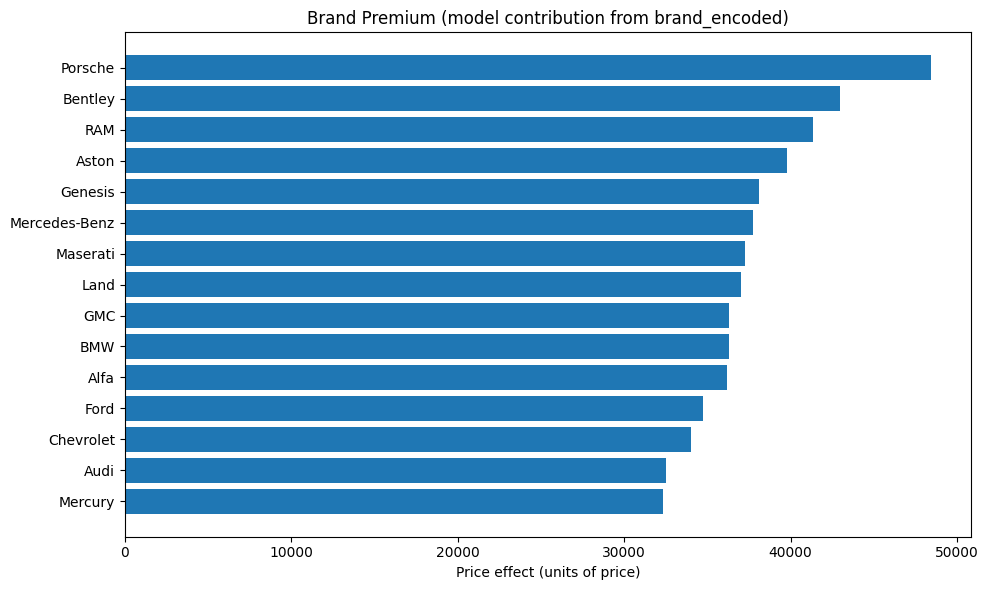

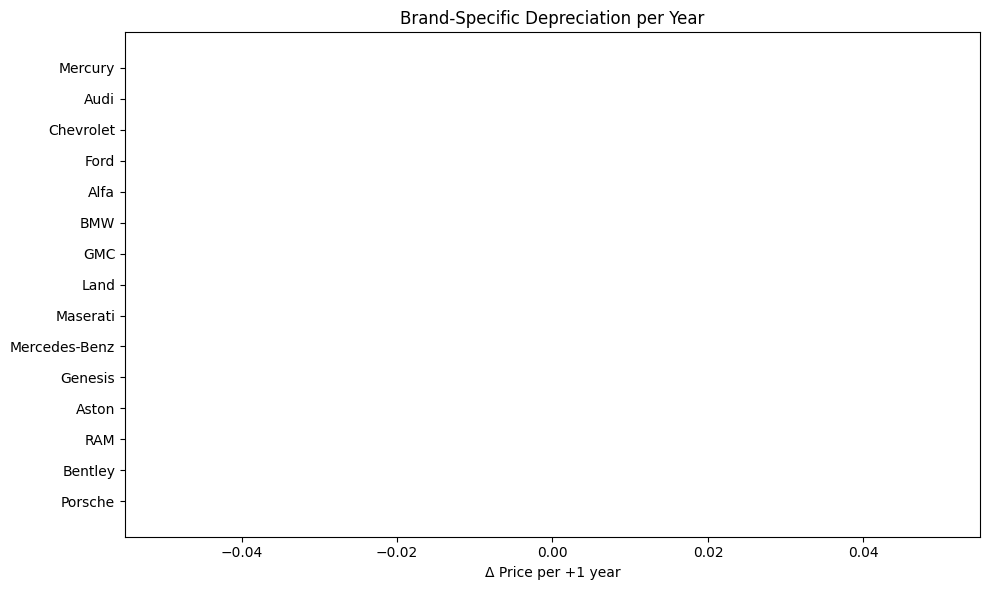

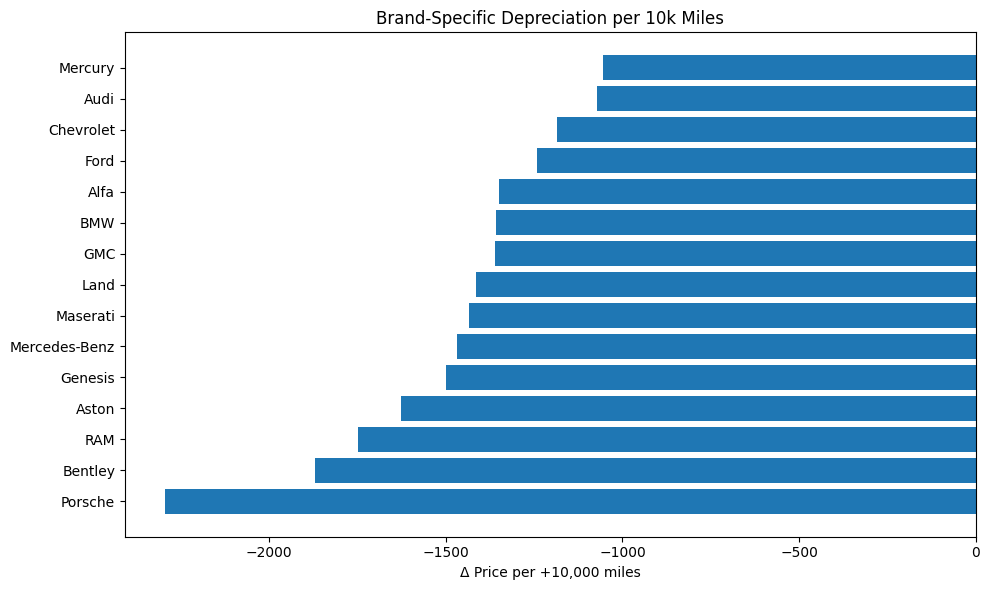


Insights:
 • Highest premium brand (by model’s brand term): Porsche (≈ 48,449)
 • Fastest age depreciation: Porsche (≈ 0 per +1 year)
 • Fastest mileage depreciation: Porsche (≈ -2,294 per +10k miles)


In [ ]:
#brand Model
# ================== BRAND-SPECIFIC EFFECTS: PREMIUM & SLOPES ==================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Grab brand encoding map learned by the transformer
brand_enc_step = pipe.named_steps["brand_enc"]
brand_map = brand_enc_step.map_.copy()              # Series: brand -> target mean price (smoothed)
global_mean = brand_enc_step.global_mean_

# 2) Build feature-name list in model order (reuse the helper we defined)
def feature_names_from_ct(ct, X_after_brand, cat_cols):
    try:
        names = list(ct.get_feature_names_out())
        return [n.replace("remainder__", "") for n in names]
    except Exception:
        # manual fallback
        ohe = ct.named_transformers_.get("ohe", None)
        ohe_names = []
        if ohe is not None and hasattr(ohe, "categories_") and len(cat_cols) > 0:
            drop_mode = getattr(ohe, "drop", None)
            for col, cats in zip(cat_cols, ohe.categories_):
                start = 1 if drop_mode in ("first", "if_binary") else 0
                ohe_names.extend([f"{col}_{c}" for c in cats[start:]])
        passthrough_names = [c for c in X_after_brand.columns if c not in cat_cols]
        return ohe_names + passthrough_names

# Recreate the train-space columns that fed ColumnTransformer (imputed -> brand_enc)
X_after_brand = pipe.named_steps["brand_enc"].transform(
    pipe.named_steps["impute"].transform(X_train.copy()) if "impute" in pipe.named_steps else X_train.copy()
)
ct = pipe.named_steps["prep"]
feature_names = feature_names_from_ct(ct, X_after_brand, ct.transformers_[0][2] if len(ct.transformers_) else [])

# 3) Make a quick name->coef lookup
coefs = pipe.named_steps["model"].coef_
coef_map = dict(zip(feature_names, coefs))

# 4) Pull the coefficients we need (present-or-zero safe)
def c(name):
    return float(coef_map.get(name, 0.0))

coef_brand          = c("brand_encoded")
coef_age_base       = c("vehicle_age")
coef_miles_base     = c("milage")
coef_age_inter      = c("brandX_brand_x_vehicle_age")
coef_miles_inter    = c("brandX_brand_x_milage")

# 5) For each brand, compute premium and slopes
rows = []
for brand, te_val in brand_map.items():
    # brand premium in price units: coef_brand * TE(brand)
    brand_premium = coef_brand * float(te_val)

    # marginal effect (slope) for age and mileage at that brand
    # slope_age(brand)   = base_age_coef + age_interaction_coef * TE(brand)
    # slope_miles(brand) = base_miles_coef + miles_interaction_coef * TE(brand)
    slope_age   = coef_age_base   + coef_age_inter   * float(te_val)
    slope_miles = coef_miles_base + coef_miles_inter * float(te_val)

    rows.append({
        "brand": brand,
        "brand_target_mean": float(te_val),
        "brand_premium": brand_premium,             # $ change contributed by brand feature
        "slope_age_per_year": slope_age,            # $ change per +1 year
        "slope_miles_per_mile": slope_miles,        # $ change per +1 mile
        "slope_miles_per_10k": slope_miles * 10_000 # $ per +10,000 miles (easier to read)
    })

brand_effects = (pd.DataFrame(rows)
                 .assign(delta_5yr=lambda d: d["slope_age_per_year"] * 5,
                         delta_50k=lambda d: d["slope_miles_per_10k"] * 5)  # 50k = 5×10k
                 .sort_values("brand_premium", ascending=False)
                 .reset_index(drop=True))

print("\nTop 15 brands by estimated premium (from target encoding):")
print(brand_effects[["brand","brand_premium","slope_age_per_year","slope_miles_per_10k","delta_5yr","delta_50k"]]
      .head(15).to_string(index=False))

# Optional nice DataFrame in notebooks
try:
    display(brand_effects.head(15))
except:
    pass

# 6) Visualize: brand premium (top 15)
topn = 15
viz = brand_effects.head(topn).copy()
plt.figure(figsize=(10,6))
plt.barh(viz["brand"][::-1], viz["brand_premium"][::-1])
plt.title("Brand Premium (model contribution from brand_encoded)")
plt.xlabel("Price effect (units of price)")
plt.tight_layout()
plt.show()

# 7) Visualize: brand-specific depreciation (age slope and miles slope)
# Pick the same top brands (by premium) to compare slopes
viz2 = brand_effects.loc[brand_effects["brand"].isin(viz["brand"])]

plt.figure(figsize=(10,6))
plt.barh(viz2.sort_values("slope_age_per_year")["brand"],
         viz2.sort_values("slope_age_per_year")["slope_age_per_year"])
plt.title("Brand-Specific Depreciation per Year")
plt.xlabel("Δ Price per +1 year")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.barh(viz2.sort_values("slope_miles_per_10k")["brand"],
         viz2.sort_values("slope_miles_per_10k")["slope_miles_per_10k"])
plt.title("Brand-Specific Depreciation per 10k Miles")
plt.xlabel("Δ Price per +10,000 miles")
plt.tight_layout()
plt.show()

# 8) Quick textual insights for report use
print("\nInsights:")
top_premium = brand_effects.iloc[0]
print(f" • Highest premium brand (by model’s brand term): {top_premium['brand']} "
      f"(≈ {top_premium['brand_premium']:,.0f})")

fast_age = brand_effects.sort_values("slope_age_per_year").iloc[0]
print(f" • Fastest age depreciation: {fast_age['brand']} "
      f"(≈ {fast_age['slope_age_per_year']:,.0f} per +1 year)")

fast_miles = brand_effects.sort_values("slope_miles_per_10k").iloc[0]
print(f" • Fastest mileage depreciation: {fast_miles['brand']} "
      f"(≈ {fast_miles['slope_miles_per_10k']:,.0f} per +10k miles)")
# ==============================================================================
